In [1]:
# Google Colaboratoryを使用する場合は、下記のコメントアウトを外し、実行してください

In [2]:
# # 下記セルを実行すると、authorization codeの入力を求められます。
# # 出力されたリンク先をクリックし、Googleアカウントにログインし、
# # authorization codeをコピーし、貼り付けをおこなってください。
# import os
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# working_dir = 'MLSys_100Knocks' #　※※自分で作成したフォルダパスが異なる場合こちらを変更してください。※※
# path = f'/content/drive/MyDrive/{working_dir}/本章/3章'
# os.chdir(path)
# ! pip install japanize-matplotlib

In [4]:
##セル内複数項目表示
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ３章　可視化の仕組みを構築する１０本ノック

### ノック２１：店舗を絞り込んで可視化できるようにしてみよう

In [5]:
import pandas as pd
from IPython.display import display, clear_output

m_store = pd.read_csv('m_store.csv')
m_area = pd.read_csv('m_area.csv')
order_data = pd.read_csv('tbl_order_202004.csv')
order_data = pd.merge(order_data, m_store, on='store_id', how='left')
order_data = pd.merge(order_data, m_area, on='area_cd', how='left')

# マスターにないコードに対応した文字列を設定
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = 'デリバリー'
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'お持ち帰り'

order_data.loc[order_data['status'] == 0, 'status_name'] = '受付'
order_data.loc[order_data['status'] == 1, 'status_name'] = 'お支払済'
order_data.loc[order_data['status'] == 2, 'status_name'] = 'お渡し済'
order_data.loc[order_data['status'] == 9, 'status_name'] = 'キャンセル'

order_data.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済


In [6]:
from ipywidgets import Dropdown

def order_by_store(val):
    clear_output()
    display(dropdown)    
    pick_data = order_data.loc[(order_data['store_name']==val['new']) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())

store_list = m_store['store_name'].tolist()

dropdown = Dropdown(options=store_list)
dropdown.observe(order_by_store, names='value')
display(dropdown)

Dropdown(options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', '西葛西店', '…

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib

def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[(order_data['store_name']==val['new']) & (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()  
    temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()
    
dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store, names='value')
display(dropdown2)

Dropdown(options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', '西葛西店', '…

### ノック２２：複数店舗の詳細を可視化できるようにしてみよう

In [8]:
from ipywidgets import SelectMultiple

def order_by_multi(val):
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data['store_name'].isin(val['new']))  & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())

select = SelectMultiple(options=store_list)
select.observe(order_by_multi, names='value')
display(select)

SelectMultiple(index=(0,), options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店',…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
115,99677323,1,C25851661,13,62831726,2020-04-01 11:09:09,2020-04-01 11:32:09,0,2471,2,昭島店,TK,東京,東京,デリバリー,お渡し済,2020-04-01
593,29624915,1,C80269937,24,75728466,2020-04-01 11:49:49,2020-04-01 12:31:49,1,2615,1,昭島店,TK,東京,東京,お持ち帰り,お支払済,2020-04-01
1196,58973832,1,C77508455,24,46666810,2020-04-01 12:41:41,2020-04-01 13:40:41,0,3931,2,昭島店,TK,東京,東京,デリバリー,お渡し済,2020-04-01
1932,44004935,1,C71855263,68,38680221,2020-04-01 13:45:45,2020-04-01 14:29:45,0,3586,2,昭島店,TK,東京,東京,デリバリー,お渡し済,2020-04-01
1992,98271769,1,C85259317,72,80057289,2020-04-01 13:50:50,2020-04-01 14:15:50,1,2808,1,昭島店,TK,東京,東京,お持ち帰り,お支払済,2020-04-01


SelectMultiple(index=(2,), options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店',…

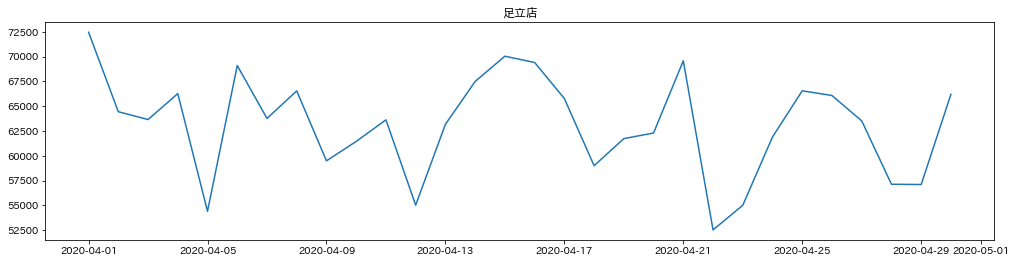

In [9]:
def graph_by_multi(val):
    clear_output()
    display(select2)
    
    fig = plt.figure(figsize=(17,4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)
    
    i = 0
    
    for trg in val['new']:
        pick_data = order_data[(order_data['store_name']==trg) & (order_data['status'].isin([1, 2]))]
        temp = pick_data[['order_accept_date', 'total_amount', 'store_name']].copy()
        temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
        temp.set_index('order_accept_date', inplace=True)
        i += 1
        ax = fig.add_subplot(1, len(val['new']), i)
        ax.plot(temp.resample('D').sum())
        ax.set_title(trg)
        
    
select2 = SelectMultiple(options=store_list)
select2.observe(graph_by_multi, names='value')
display(select2)

### ノック２３：スライドバーを用いてオーダー件数を調べてみよう

In [10]:
from ipywidgets import IntSlider

def store_lower(val):
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() < val['new']])

slider = IntSlider(value=1100, min=1000, max=2000, step=100, description='件数:',)
slider.observe(store_lower, names='value')
display(slider)

IntSlider(value=1100, description='件数:', max=2000, min=1000, step=100)

In [11]:
def store_upper(val):
    clear_output()
    display(slider2)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() > val['new']])

slider2 = IntSlider(value=1600, min=1000, max=2000, step=100, description='件数:',)
slider2.observe(store_upper, names='value')
display(slider2)

IntSlider(value=1600, description='件数:', max=2000, min=1000, step=100)

### ノック２４：トグルボタンで地域データを抽出しよう

In [12]:
from ipywidgets import ToggleButtons

area_list = m_area['wide_area'].unique()

def order_by_area(val):
    clear_output()
    display(toggle)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new']) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())

toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area, names='value')
display(toggle)

ToggleButtons(index=1, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='神奈川')

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
21,50816500,104,C10171802,12,17590480,2020-04-01 11:01:01,2020-04-01 11:52:01,0,2064,2,座間店,KN,神奈川,神奈川,デリバリー,お渡し済,2020-04-01
22,13823382,116,C88441715,84,1062381,2020-04-01 11:01:01,2020-04-01 11:34:01,0,2827,2,旭店,KN,神奈川,神奈川,デリバリー,お渡し済,2020-04-01
23,47946378,119,C07955014,60,45213676,2020-04-01 11:01:01,2020-04-01 11:39:01,0,3901,2,神奈川店,KN,神奈川,神奈川,デリバリー,お渡し済,2020-04-01
25,3297281,111,C20128438,47,32137060,2020-04-01 11:01:01,2020-04-01 11:40:01,0,698,2,三浦店,KN,神奈川,神奈川,デリバリー,お渡し済,2020-04-01
28,29710241,96,C38686026,47,77936983,2020-04-01 11:01:01,2020-04-01 12:13:01,0,3120,2,川崎店,KN,神奈川,神奈川,デリバリー,お渡し済,2020-04-01


ToggleButtons(index=1, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='神奈川')

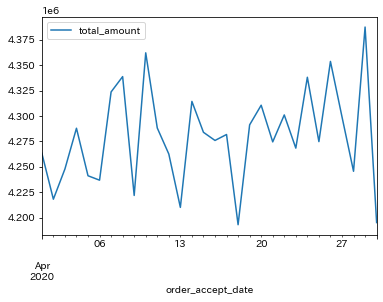

In [13]:
def graph_by_area(val):
    clear_output()
    display(toggle2)
    pick_data = order_data.loc[(order_data['wide_area']==val['new']) & (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()  
    temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()

toggle2 = ToggleButtons(options=area_list)
toggle2.observe(graph_by_area, names='value')
display(toggle2)

### ノック２５：日付を指定してデータを抽出してみよう

In [14]:
from ipywidgets import DatePicker
import datetime

order_data.loc[:,'order_date'] = pd.to_datetime(order_data['order_accept_date']).dt.date

def order_by_date(val):
    clear_output()
    display(date_picker)
    pick_data = order_data.loc[(order_data['order_date'] == val['new']) & (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())

date_picker = DatePicker(value=datetime.datetime(2020, 4, 1))
date_picker.observe(order_by_date, names='value')
display(date_picker)

DatePicker(value=datetime.date(2020, 4, 23))

6328


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
171085,59854187,185,C35869606,80,67066334,2020-04-23 11:00:00,2020-04-23 11:13:00,1,3742,1,守谷店,IB,北関東,茨城,お持ち帰り,お支払済,2020-04-23
171086,75553104,167,C44615840,42,7165273,2020-04-23 11:00:00,2020-04-23 11:44:00,0,3050,2,さいたま南店,SA,埼玉,埼玉,デリバリー,お渡し済,2020-04-23
171088,38328761,84,C28630776,96,90001727,2020-04-23 11:00:00,2020-04-23 11:10:00,0,939,2,武蔵村山店,TK,東京,東京,デリバリー,お渡し済,2020-04-23
171090,95391471,64,C24456705,50,3263696,2020-04-23 11:00:00,2020-04-23 11:13:00,1,4624,1,西東京店,TK,東京,東京,お持ち帰り,お支払済,2020-04-23
171091,18827140,33,C19614834,42,91990108,2020-04-23 11:00:00,2020-04-23 11:55:00,0,2308,2,渋谷店,TK,東京,東京,デリバリー,お渡し済,2020-04-23


In [15]:
min_date = datetime.date(2020, 4, 1)
max_date = datetime.date(2020, 4, 30)

# 期間が設定されたら呼ばれれる関数、期間データを抽出し画面に表示
def order_between_date():
    clear_output()
    display(date_picker_min)
    display(date_picker_max)
    pick_data = order_data.loc[(order_data['order_date'] >= min_date) & (order_data['order_date'] <= max_date) & (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())

# 最小日（期間自）の日付を変数にセットする関数
def set_min_date(val):
    global min_date
    min_date = val['new']
    order_between_date()

# 最大日（期間至）の日付を変数にセットする関数
def set_max_date(val):
    global max_date
    max_date = val['new']
    order_between_date()

date_picker_min = DatePicker(value=min_date)
date_picker_min.observe(set_min_date, names='value')
print("最小日付")
display(date_picker_min)
date_picker_max = DatePicker(value=max_date)
date_picker_max.observe(set_max_date, names='value')
print("最大日付")
display(date_picker_max)

最小日付


DatePicker(value=datetime.date(2020, 4, 1))

最大日付


DatePicker(value=datetime.date(2020, 4, 30))

### ノック２６：ストーリーを考えてデータを構築しよう

In [16]:
import glob
import os
current_dir = os.getcwd()
tbl_order_file = os.path.join(current_dir, 'tbl_order_*.csv')
tbl_order_files = glob.glob(tbl_order_file)

order_all = pd.DataFrame()
for file in tbl_order_files:
    order_tmp = pd.read_csv(file)
    print(f'{file}:{len(order_tmp)}')
    order_all = pd.concat([order_all, order_tmp], ignore_index=True)

# 保守用店舗データの削除
order_all = order_all.loc[order_all['store_id'] != 999]

order_all = pd.merge(order_all, m_store, on='store_id', how='left')
order_all = pd.merge(order_all, m_area, on='area_cd', how='left')

# マスターにないコードに対応した文字列を設定
order_all.loc[order_all['takeout_flag'] == 0, 'takeout_name'] = 'デリバリー'
order_all.loc[order_all['takeout_flag'] == 1, 'takeout_name'] = 'お持ち帰り'

order_all.loc[order_all['status'] == 0, 'status_name'] = '受付'
order_all.loc[order_all['status'] == 1, 'status_name'] = 'お支払済'
order_all.loc[order_all['status'] == 2, 'status_name'] = 'お渡し済'
order_all.loc[order_all['status'] == 9, 'status_name'] = 'キャンセル'

order_all.loc[:,'order_date'] = pd.to_datetime(order_all['order_accept_date']).dt.date

order_all.groupby(['store_id', 'customer_id'])["total_amount"].describe()

D:\driver\MLSys_100Knocks\本章\3章\tbl_order_202004.csv:233260
D:\driver\MLSys_100Knocks\本章\3章\tbl_order_202005.csv:241139
D:\driver\MLSys_100Knocks\本章\3章\tbl_order_202006.csv:233301


count         mean          std     min      25%  \
store_id customer_id                                                     
1        C00244531     14.0  3319.571429   860.262546  1882.0  2515.75   
         C00493736      7.0  3318.142857   922.546915  2471.0  2719.00   
         C01249550      8.0  2664.375000   848.339881  1857.0  2029.75   
         C02241044      6.0  3653.833333  1184.407770  2252.0  2571.00   
         C02859946      9.0  3216.555556   858.216044  1857.0  2647.00   
...                     ...          ...          ...     ...      ...   
196      C84471901     66.0  2781.772727   805.412494   698.0  2255.50   
         C88251581     58.0  3054.465517   984.291289   698.0  2328.00   
         C90878439     73.0  2851.068493   852.860779   698.0  2154.00   
         C97487773     61.0  2988.524590   892.917047   698.0  2238.00   
         C98683987     71.0  2878.042254   913.949458   698.0  2154.00   

                         50%      75%     max  
store_id customer_id                           
1        C00244531    3679.5  3901.00  4462.0  
         C00493736    2987.0  3615.50  5100.0  
         C01249550    2379.5  3132.75  3931.0  
         C02241044    3979.5  4683.75  4692.0  
         C02859946    3586.0  3900.00  3931.0  
...                      ...      ...     ...  
196      C84471901    2677.0  3172.25  4659.0  
         C88251581    2987.0  3891.25  4659.0  
         C90878439    2615.0  3865.00  4659.0  
         C97487773    2750.0  3900.00  4659.0  
         C98683987    2677.0  3530.00  4659.0  

[41336 rows x 8 columns]

In [17]:
summary_df = order_all.loc[order_all['status'].isin([1, 2])]
store_summary_df = summary_df.groupby(['store_id'])['total_amount'].sum()
store_summary_df = pd.merge(store_summary_df, m_store, on='store_id', how='left')
print("売上上位")
display(store_summary_df.sort_values('total_amount', ascending=False).head(10))
print("売上下位")
display(store_summary_df.sort_values('total_amount', ascending=True).head(10))

売上上位


,store_id,total_amount,store_name,area_cd
47,48,11992501,上野店,TK
190,191,11821224,伊勢崎店,GU
122,123,11320012,栄店,KN
67,68,11272728,八王子店,TK
62,63,11201742,西多摩店,TK
126,127,11179377,戸塚店,KN
99,100,11128515,中原店,KN
43,44,11079128,世田谷店,TK
172,173,11001277,戸田店,SA
78,79,10989669,三鷹店,TK


売上下位


,store_id,total_amount,store_name,area_cd
100,101,5350100,宮前店,KN
75,76,5701753,本郷店,TK
2,3,5712210,足立店,TK
151,152,5723229,四街道店,CH
11,12,5808496,西葛西店,TK
195,196,5901819,前橋店,GU
185,186,6087730,足利店,TO
161,162,6158812,越谷店,SA
69,70,6242227,東久留米店,TK
145,146,6307301,成田店,CH


In [18]:
cancel_df = pd.DataFrame()
cancel_cnt = order_all.loc[order_all['status']==9].groupby(['store_id'])['store_id'].count()
order_cnt = order_all.loc[order_all['status'].isin([1, 2, 9])].groupby(['store_id'])['store_id'].count()
cancel_rate = (cancel_cnt / order_cnt) * 100
cancel_df["cancel_rate"] = cancel_rate
cancel_df = pd.merge(cancel_df, m_store, on='store_id', how='left')
print("キャンセル率が低い")
display(cancel_df.sort_values('cancel_rate', ascending=True).head(10))
print("キャンセル率が高い")
display(cancel_df.sort_values('cancel_rate', ascending=False).head(10))

キャンセル率が低い


,store_id,cancel_rate,store_name,area_cd
121,122,16.464415,港北店,KN
130,131,16.641406,我孫子店,CH
119,120,16.702298,金沢店,KN
152,153,17.036115,上尾店,SA
19,20,17.127722,王子店,TK
40,41,17.206367,荻窪店,TK
68,69,17.295981,羽村店,TK
122,123,17.314335,栄店,KN
33,34,17.321016,恵比寿店,TK
181,182,17.322176,那珂店,IB


キャンセル率が高い


,store_id,cancel_rate,store_name,area_cd
7,8,20.305677,板橋店,TK
138,139,20.148791,白井店,CH
131,132,19.948335,市川店,CH
156,157,19.929245,川越店,SA
95,96,19.657880,川崎店,KN
65,66,19.627809,石神井店,TK
75,76,19.534050,本郷店,TK
9,10,19.480519,稲城店,TK
18,19,19.470046,赤羽店,TK
161,162,19.469357,越谷店,SA


### ノック２７：キャンセルの理由を分析してみよう

In [19]:
order_all.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済,2020-04-01
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済,2020-04-01
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済,2020-04-01
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済,2020-04-01
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済,2020-04-01


In [20]:
def calc_delta(t):
    t1, t2 = t
    delta = t2 - t1
    return delta.total_seconds()/60

order_all.loc[:,'order_accept_datetime'] = pd.to_datetime(order_all['order_accept_date'])
order_all.loc[:,'delivered_datetime'] = pd.to_datetime(order_all['delivered_date'])
order_all.loc[:,'delta'] = order_all[['order_accept_datetime', 'delivered_datetime']].apply(calc_delta, axis=1)

delivery_df = order_all.loc[(order_all['status']==2) & (order_all['store_id'].isin([8, 122]))]
delivery_df.groupby(['store_id'])['delta'].mean()

store_id
8      47.675633
122    20.194532
Name: delta, dtype: float64

### ノック２８：仮説を検証してみよう

In [21]:
temp_cancel = cancel_df.copy()
temp_delivery = order_all.loc[order_all['status']==2].groupby([('store_id')])['delta'].mean()
check_df = pd.merge(temp_cancel, temp_delivery, on='store_id', how='left')
check_df.head()

,store_id,cancel_rate,store_name,area_cd,delta
0,1,19.026175,昭島店,TK,34.396182
1,2,18.660150,あきる野店,TK,34.835941
2,3,18.432286,足立店,TK,34.461939
3,4,18.320106,北千住店,TK,34.491599
4,5,18.257150,綾瀬店,TK,34.152060


In [22]:
# 全体
temp_chk = check_df[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.658736
delta,0.658736,1.000000


In [23]:
# キャンセル率が高い（第3四分位以上）店舗のみ
th_high = check_df['cancel_rate'].quantile(0.75)
temp_chk = check_df.loc[(check_df['cancel_rate'] >= th_high)]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

# キャンセル率が低い（第1四分位以下）店舗のみ
th_low = check_df['cancel_rate'].quantile(0.25)
temp_chk = check_df.loc[(check_df['cancel_rate'] >= th_low)]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.0000,0.7868
delta,0.7868,1.0000


,cancel_rate,delta
cancel_rate,1.000000,0.617896
delta,0.617896,1.000000


### ノック２９：ストーリーをもとにパーツやデータを組み合わせてダッシュボードを作ろう

In [69]:
order_all.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date,order_accept_datetime,delivered_datetime,delta
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済,2020-04-01,2020-04-01 11:00:00,2020-04-01 11:18:00,18.0
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済,2020-04-01,2020-04-01 11:00:00,2020-04-01 11:22:00,22.0
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済,2020-04-01,2020-04-01 11:00:00,2020-04-01 11:15:00,15.0
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済,2020-04-01,2020-04-01 11:00:00,2020-04-01 11:16:00,16.0
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済,2020-04-01,2020-04-01 11:00:00,2020-04-01 11:53:00,53.0


In [70]:
import seaborn as sns

# 環境変数
target_store = ""
isDateHave = ""
min_date = datetime.date(2020, 4, 1)
max_date = datetime.date(2020, 4, 30)

In [71]:
def make_board():
    clear_output()
    display(toggle_db)
    
    # データ作成処理
    pick_order_data = order_all.loc[(order_all['store_name']==target_store) & (order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status'].isin([1, 2]))]
    pick_cancel_data = order_all.loc[(order_all['store_name']==target_store) & (order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status']==9)]
    pick_order_all = order_all.loc[(order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status'].isin([1, 2]))]
    pick_cancel_all = order_all.loc[(order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status']==9)]
    store_o_cnt = len(pick_order_data)
    store_c_cnt = len(pick_order_data['customer_id'].unique())
    store_cancel_rate = (len(pick_cancel_data)/(len(pick_order_data)+len(pick_cancel_data))) * 100
    delivery_time = pick_order_data.loc[pick_order_data['status'] == 2]['delta'].mean()
    delivery_time_all = pick_order_all.loc[pick_order_all['status'] == 2]['delta'].mean()
    
    # 画面の描画処理
    temp = pick_order_data[['order_date', 'total_amount']].copy()
    temp.loc[:,'order_date'] = pd.to_datetime(temp['order_date'])
    temp.set_index('order_date', inplace=True)
    
    print("========================================================================================================")
    str_out = f"■■{target_store}■■ 【対象期間】：{min_date}～{max_date} "
    str_out = str_out + f"【オーダー件数】：{store_o_cnt} 件  【利用顧客数】: {store_c_cnt}"
    print(str_out)
    print("--------------------------------------------------------------------------------------------------------")
    print(f"■■■■■■ 日毎の売上 ■■■■■■■■")
    display(temp.resample('D').sum())
    print("--------------------------------------------------------------------------------------------------------")
    str_out = f"【期間売上総額】：{'{:,}'.format(temp['total_amount'].sum())} "
    str_out = str_out + f"【キャンセル総額】：{'{:,}'.format(pick_cancel_data['total_amount'].sum())} "
    str_out = str_out + f"【キャンセル率】:{round(store_cancel_rate, 2)} % "
    print(str_out)
    str_out = f"【平均配達完了時間】：{round(delivery_time, 2)}分"
    str_out = str_out + f"【全店舗平均配達時間】：{round(delivery_time_all, 2)}分"
    print(str_out)
    print("--------------------------------------------------------------------------------------------------------")
    
    # グラフ作成処理
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    sns.histplot(temp.resample('D').sum(), ax=ax1, kde=False)
    ax1.set_title("売上（日単位）ヒストグラム")
    
    sns.countplot(x='order_date', data=pick_cancel_data, ax=ax2)
    ax2.set_title("キャンセル数（日単位）")
        
    fig, (ax3) = plt.subplots(1, 1, figsize=(20 ,5))
    sns.boxplot(x="order_date", y="total_amount", data=pick_order_data)
    ax3.set_title("オーダー状況箱ひげ図")
          
    plt.show()

In [72]:
# カレンダー変更時の処理
def change_date_min(val):
    global min_date
    min_data = val['new']
    make_board()

def change_date_max(val):
    global max_date
    max_date = val['new']
    make_board()

In [73]:
# ドロップダウン変更時の処理
def change_dropdown(val):
    global target_store
    target_store = val['new']

    global isDateHave 
    if isDateHave == "":        
        # 期間指定機能
        date_picker_min = DatePicker(value=min_date)
        date_picker_min.observe(change_date_min, names='value')
        print("期間")
        date_picker_max = DatePicker(value=max_date)
        date_picker_max.observe(change_date_max, names='value')
        display(date_picker_min, date_picker_max)
#         print(val)
        isDateHave = "have"

In [74]:
# 地域トグルボタン処理
def order_by_area(val):
    clear_output()
    display(toggle_db)
    # 選択された地域の店舗リストを作成する
    store_list = order_all.loc[order_all['wide_area']==val['new']]['store_name'].unique()
    # 作成された店舗リストでドロップダウンを作成する
    dropdown = Dropdown(options=store_list)
    dropdown.observe(change_dropdown, names='value')
    display(dropdown)
#     print(val)
    global isDateHave
    isDateHave = ""

ToggleButtons(index=2, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='千葉')

■■松戸店■■ 【対象期間】：2020-04-01～2020-05-28 【オーダー件数】：1911 件  【利用顧客数】: 141
--------------------------------------------------------------------------------------------------------
■■■■■■ 日毎の売上 ■■■■■■■■


,total_amount
order_date,
2020-04-01,115347
2020-04-02,107763
2020-04-03,102204
2020-04-04,111287
2020-04-05,112863
2020-04-06,99377
2020-04-07,112120
2020-04-08,115689
2020-04-09,108609


--------------------------------------------------------------------------------------------------------
【期間売上総額】：6,041,415 【キャンセル総額】：1,329,772 【キャンセル率】:18.33 % 
【平均配達完了時間】：34.41分【全店舗平均配達時間】：34.33分
--------------------------------------------------------------------------------------------------------


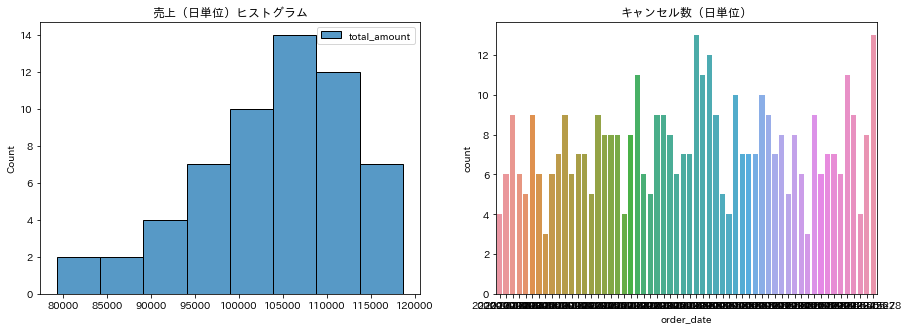

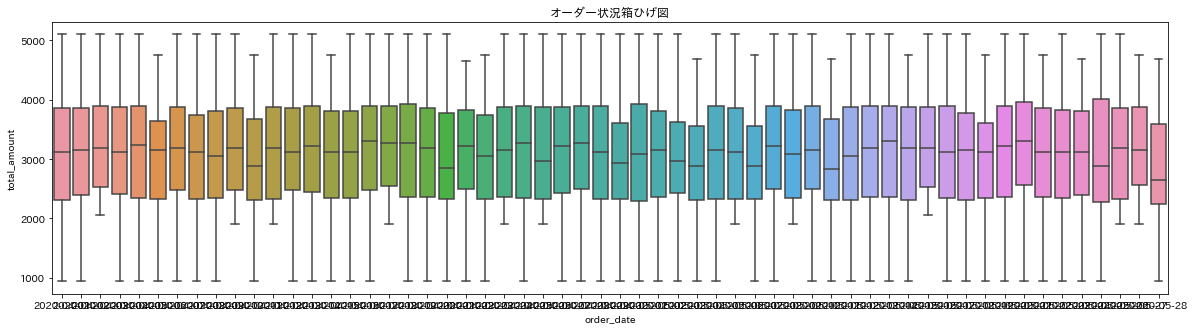

In [75]:
# トグルボタンを表示
toggle_db = ToggleButtons(options=area_list)
toggle_db.observe(order_by_area, names='value')
display(toggle_db)

### ノック３０：ダッシュボードを改善しよう

In [76]:
cal_orders_base = order_all.loc[(order_all['status'].isin([1, 2]))]
    
# 地域のランキング（配達時間）
print("配達時間　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝")
print("地域ランキング ---------------")
display(pd.DataFrame(cal_orders_base.groupby(['narrow_area'])['delta'].mean().sort_values()))
print("地域毎のTOP5 ---------------")
for area in m_area['area_cd']:
    temp = cal_orders_base.loc[cal_orders_base['area_cd']==area]
    temp = temp.groupby(['store_id'])['delta'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[['store_name', 'delta']]
    display(temp.head())

配達時間　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
地域ランキング ---------------


,delta
narrow_area,
茨城,32.248904
神奈川,33.706886
東京,34.490798
群馬,34.499775
栃木,34.544332
埼玉,34.754362
千葉,34.948273


地域毎のTOP5 ---------------


,store_name,delta
0,羽村店,20.237703
1,荻窪店,20.302287
2,恵比寿店,20.305666
3,王子店,20.518821
4,自由が丘店,33.999357


,store_name,delta
0,金沢店,20.143407
1,港北店,20.240675
2,栄店,20.313838
3,南足柄店,33.954729
4,高座店,34.016667


,store_name,delta
0,我孫子店,20.029818
1,富津店,33.881113
2,流山店,33.944780
3,茂原店,34.124691
4,習志野店,34.162115


,store_name,delta
0,上尾店,20.231162
1,入間店,33.877739
2,坂戸店,34.086772
3,鴻巣店,34.350217
4,八潮店,34.356452


,store_name,delta
0,那珂店,20.454453
1,日立店,34.370252
2,守谷店,34.417418
3,取手店,34.452658
4,水戸店,34.620482


,store_name,delta
0,宇都宮店,34.082036
1,栃木店,34.351788
2,佐野店,34.671017
3,足利店,34.792129
4,小山店,34.852287


,store_name,delta
0,前橋店,33.866403
1,太田店,34.486272
2,伊勢崎店,34.557435
3,館林店,34.559044
4,桐生店,34.619000


In [77]:
# 地域のランキング（キャンセル率）
base_df = pd.merge(check_df, m_store, on='area_cd')
base_df = pd.merge(base_df, m_area, on='area_cd')
print("キャンセル率　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝")
print("地域ランキング ---------------")
display(pd.DataFrame(base_df.groupby(['narrow_area'])['cancel_rate'].mean().sort_values()))
print("地域毎のTOP5 ---------------")
for area in m_area['area_cd']:
    temp = check_df.loc[check_df['area_cd']==area]
    temp = temp.groupby(['store_id'])['cancel_rate'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[['store_name', 'cancel_rate']]
    display(temp.head())

キャンセル率　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
地域ランキング ---------------


,cancel_rate
narrow_area,
神奈川,18.225274
茨城,18.248213
千葉,18.364046
栃木,18.376046
埼玉,18.442886
東京,18.452096
群馬,18.518733


地域毎のTOP5 ---------------


,store_name,cancel_rate
0,王子店,17.127722
1,荻窪店,17.206367
2,羽村店,17.295981
3,恵比寿店,17.321016
4,赤坂店,17.354009


,store_name,cancel_rate
0,港北店,16.464415
1,金沢店,16.702298
2,栄店,17.314335
3,愛甲店,17.456758
4,磯子店,17.460317


,store_name,cancel_rate
0,我孫子店,16.641406
1,富津店,17.486877
2,若葉店,17.489948
3,成田店,17.542504
4,佐倉店,17.568072


,store_name,cancel_rate
0,上尾店,17.036115
1,草加店,17.445799
2,大宮店,17.660264
3,和光店,17.781735
4,川口店,17.856058


,store_name,cancel_rate
0,那珂店,17.322176
1,守谷店,17.326449
2,日立店,18.262458
3,取手店,18.549312
4,水戸店,18.945312


,store_name,cancel_rate
0,足利店,17.451062
1,宇都宮店,17.847114
2,小山店,18.770546
3,栃木店,18.896165
4,佐野店,18.915344


,store_name,cancel_rate
0,伊勢崎店,17.753322
1,高崎店,17.963895
2,太田店,18.376494
3,桐生店,18.761931
4,前橋店,18.802732
